In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# Experiment-1:

In [ ]:
import math 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
import cv2 


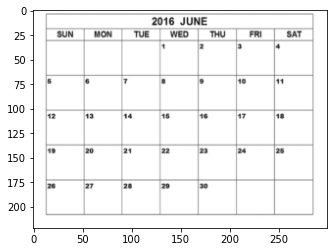

In [ ]:
fname = 'trial2-300x222.webp'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

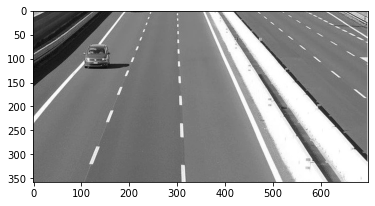

In [ ]:
fname = 'image_2.PNG'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

# Standard Hough Line Transform:

In [ ]:
img = cv2.imread('trial2-300x222.webp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
   rho,theta=line[0]
   a=np.cos(theta)
   b=np.sin(theta)
   x0=a*rho
   y0=b*rho
   x1 = int(x0+1000*(-b))
   y1 = int(y0+1000*(a))
   x2 = int(x0-1000*(-b))
   y2 = int(y0-1000*(a))
   cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2)

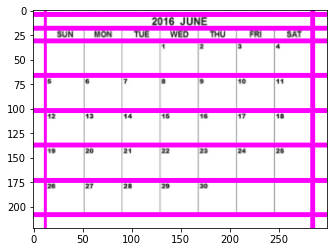

In [ ]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
img = cv2.imread('image_2.PNG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
   rho,theta=line[0]
   a=np.cos(theta)
   b=np.sin(theta)
   x0=a*rho
   y0=b*rho
   x1 = int(x0+1000*(-b))
   y1 = int(y0+1000*(a))
   x2 = int(x0-1000*(-b))
   y2 = int(y0-1000*(a))
   cv2.line(img,(x1,y1),(x2,y2),(255,0,255),2)

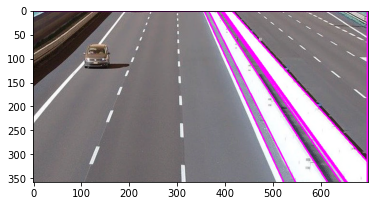

In [ ]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

# Probabilistic Hough Line Transform

In [ ]:
img = cv2.imread('trial2-300x222.webp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=40)
for line in lines:
     x1,y1,x2,y2=line[0]
     cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

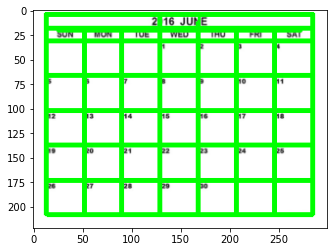

In [ ]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
img = cv2.imread('image_2.PNG')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=40)
for line in lines:
     x1,y1,x2,y2=line[0]
     cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

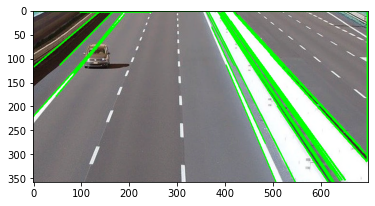

In [ ]:
arr = np.asarray(img)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

# Experiment-2:

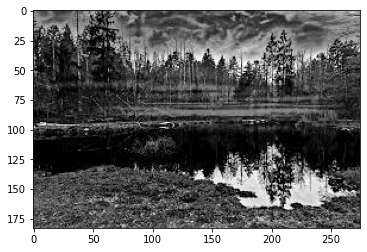

In [ ]:
fname = 'download.PNG'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
import numpy as np
import cv2

class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

 def getX(self):
  return self.x
 def getY(self):
  return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
 return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
 if p != 0:
  connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
     Point(0, 1), Point(-1, 1), Point(-1, 0)]
 else:
  connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
 return connects

def regionGrow(img,seeds,thresh,p = 1):
 height, weight = img.shape
 seedMark = np.zeros(img.shape)
 seedList = []
 for seed in seeds:
  seedList.append(seed)
 label = 1
 connects = selectConnects(p)
 while(len(seedList)>0):
  currentPoint = seedList.pop(0)

  seedMark[currentPoint.x,currentPoint.y] = label
  for i in range(8):
   tmpX = currentPoint.x + connects[i].x
   tmpY = currentPoint.y + connects[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
   if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
    seedMark[tmpX,tmpY] = label
    seedList.append(Point(tmpX,tmpY))
 return seedMark


img = cv2.imread('download.png',0)
seeds = [Point(10,10),Point(82,150),Point(20,200)]
binaryImg = regionGrow(img,seeds,10)
# cv2.imshow(' ',binaryImg)
# cv2.waitKey(0)
# 	run_region_growing_on_image('images.jpeg')

-1

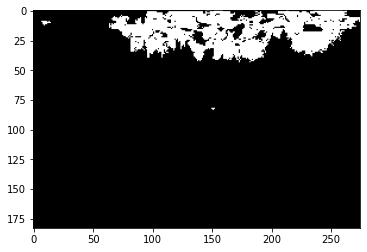

In [ ]:
plt.imshow(binaryImg, cmap='gray')

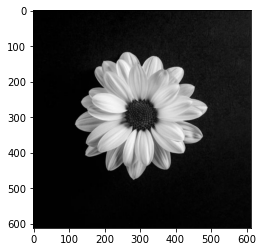

In [ ]:
fname = 'Img_1.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
import numpy as np
import cv2

class Point(object):
 def __init__(self,x,y):
  self.x = x
  self.y = y

 def getX(self):
  return self.x
 def getY(self):
  return self.y

def getGrayDiff(img,currentPoint,tmpPoint):
 return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

def selectConnects(p):
 if p != 0:
  connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), \
     Point(0, 1), Point(-1, 1), Point(-1, 0)]
 else:
  connects = [ Point(0, -1), Point(1, 0),Point(0, 1), Point(-1, 0)]
 return connects

def regionGrow(img,seeds,thresh,p = 1):
 height, weight = img.shape
 seedMark = np.zeros(img.shape)
 seedList = []
 for seed in seeds:
  seedList.append(seed)
 label = 1
 connects = selectConnects(p)
 while(len(seedList)>0):
  currentPoint = seedList.pop(0)

  seedMark[currentPoint.x,currentPoint.y] = label
  for i in range(8):
   tmpX = currentPoint.x + connects[i].x
   tmpY = currentPoint.y + connects[i].y
   if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
    continue
   grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY))
   if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
    seedMark[tmpX,tmpY] = label
    seedList.append(Point(tmpX,tmpY))
 return seedMark


img = cv2.imread('Img_1.jpg',0)
seeds = [Point(10,10),Point(82,150),Point(20,200)]
binaryImg = regionGrow(img,seeds,10)
# cv2.imshow(' ',binaryImg)
# cv2.waitKey(0)
# 	run_region_growing_on_image('images.jpeg')

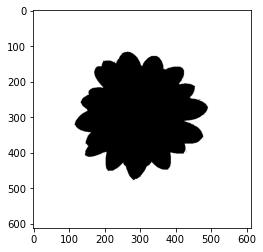

In [ ]:
plt.imshow(binaryImg, cmap='gray')